# Exercise: Train and Run Your First Model

We've learned that models are computer code that processes information to make a prediction or a decision. Here, we train a model to guess a comfortable boot size for a dog, based on the size of the harness that fits it.

In the following examples, there's no need to edit any code. Try to read it, understand it, then press the **Run** button to run it. As always with these notebooks, it's vitally important that these code blocks are run in the correct order, and nothing is missed.

> **Note**: If you've never used the Jupyter Notebooks environment before, there are a few things of which you should be aware:
> 
> - Notebooks are made up of *cells*. Some cells (like this one) contain *markdown* text, while others contain code.
> - You can run each code cell by using the **&#9658; Run** button. The **&#9658; Run** button will show up when you hover over the cell.
> - Each code cell's output is displayed immediately below the cell.
> - Even though the code cells can be run individually, some variables used in the code are global to the notebook. That means that you should run all of the code cells <u>**in order**</u>. There might be dependencies between code cells, so if you skip a cell, subsequent cells might not run correctly.

## Preparing data

The first thing we do with a model is load data. We cover this in more detail in a later exercise. For now, we just write our data directly in our code. Review and run the following code to get started:


In [2]:
import pandas
import statsmodels
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
#!pip install statsmodels


# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, we simply write the name
# of the variable and it is printed nicely 
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


As you can see, we have the sizes of boots and harnesses for 50 avalanche dogs.

We want to use harness size to estimate boot size. This means `harness_size` is our _input_. We want a model that will process the input and make its own estimations of the boot size (output).  

## Select a model

The first thing we need to do is select a model. We're just getting started, so let's start with a very simple model called _OLS_. This is just a straight line (sometimes called a trendline).

Let's use an existing library to create our model, but we won't train it yet.

In [3]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not 
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


## Train our model

OLS models have two parameters (a slope and an offset), but these haven't been set in our model yet. We need to _train_ (_fit_) our model to find these values so that the model can reliably estimate dogs' boot size based on their harness size. 

The following code fits our model to data you've now seen:

In [4]:
# Train (fit) the model so that it creates a line that 
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params.iloc[1]}\n"
        f"Line Intercept: {fitted_model.params.iloc[0]}")





The following model parameters have been found:
Line slope: 0.5859254167382717
Line Intercept: 5.719109812682555


Notice how training the model set its parameters. We could interpret these directly, but it's simpler to see it as a graph:


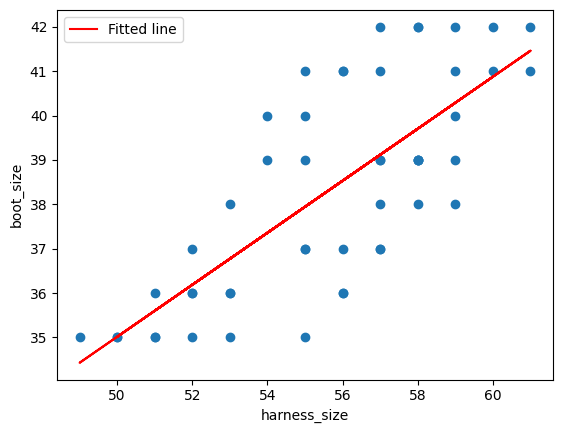

In [6]:
import matplotlib.pyplot as plt

# Show a scatter plot of the data points and add the fitted line
# Don't worry about how this works for now
plt.scatter(dataset["harness_size"], dataset["boot_size"])
plt.plot(dataset["harness_size"], fitted_model.params.iloc[1] * dataset["harness_size"] + fitted_model.params.iloc[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()


The preceding graph shows our original data as circles with a red line through it. The red line shows our _model_.

We can look at this line to understand our model. For example, we can see that as harness size increases, so does the estimated boot size. 

## Use the model

Now that we've finished training, we can use our model to predict a dog's boot size from their harness size. 

For example, by looking at the red line, we can see that that a harness size of `52.5` (x axis) corresponds to a boot size of about `36.5` (y axis).

We don't have to do this by eye, though. We can use the model in our program to predict any boot size we like. Run the following code to see how we can use our model now that it's trained:

In [5]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.48019419144182


If you'd like, change the value of `52.5` in `harness_size` to a new value and run the preceding block to see the model in action.

## Summary

Well done! You've trained your first model. We've demonstrated some topics here without detailed explanation in order to just get your feet wet. In later units, we explain many of these topics in more detail.